In [6]:
from util import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

runtime_df = pd.read_parquet(f"{RUNTIME_DIR}/all_gpus_preprocessed.parquet")
gpu_mapping = {'2080': '2080Ti', '1080': '1080Ti', 'a40': 'A40', 'p100': 'P100', 'v100': 'V100'}

# runtime_df = runtime_df[(runtime_df.dataset_type == 'tpc_ai') & (~runtime_df.operator.isin(['Noop', 'Materialization']))]
# runtime_df.GPU = runtime_df.GPU.astype(str).apply(lambda x: gpu_mapping[x])
# runtime_df.head()\
runtime_df = runtime_df[runtime_df.operator.isin(MODEL_OPERATORS)]

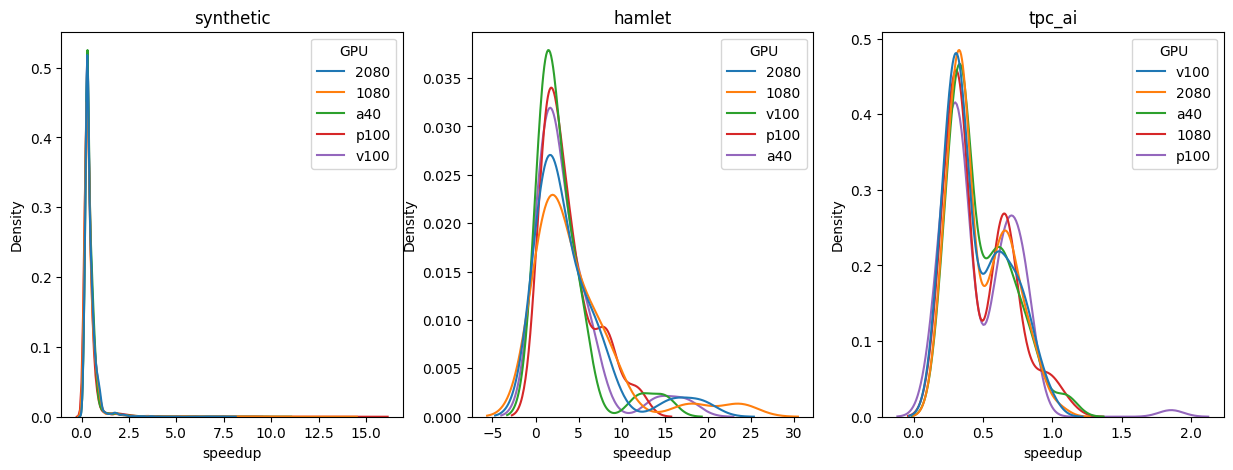

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, dataset_type in enumerate(runtime_df.dataset_type.unique()):
    sns.kdeplot(data=runtime_df[runtime_df.dataset_type == dataset_type], x='speedup', hue='GPU', ax=ax[i])
    ax[i].set_title(dataset_type)

In [12]:
tpc_df.columns

Index(['dataset', 'speedup', 'operator', 'num_cores', 'selectivity',
       'cardinality_T', 'cardinality_S', 'join', 'GPU', 'complexity_ratio',
       'dataset_type', 'label', 'features', 'parallelism', 'mem_mat_read',
       'mem_mat_write', 'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat',
       'comp_lmm_mat', 'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac',
       'comp_rmm_fac', 'comp_mat_col_major', 'comp_fac_col_major',
       'comp_scalar_dense', '13', '14', 'comp_matrix_dense',
       'mem_read_scalar_dense', 'mem_write_scalar_dense',
       'mem_read_matrix_dense', 'mem_write_matrix_dense', 'mem_read_rowsum',
       'mem_write_rowsum', 'mem_read_colsum', 'mem_write_colsum', '24', '25',
       'comp_rowsum', 'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio',
       'tr', 'fr', 'r_S', 'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S',
       'r_T', 'c_T', 'sparsity_T', 'sparsity_S', 'morpheusfi_p',
       'morpheusfi_q', 'morpheusfi_eis', 'morpheusfi_ns', 'morpheusfi_nis

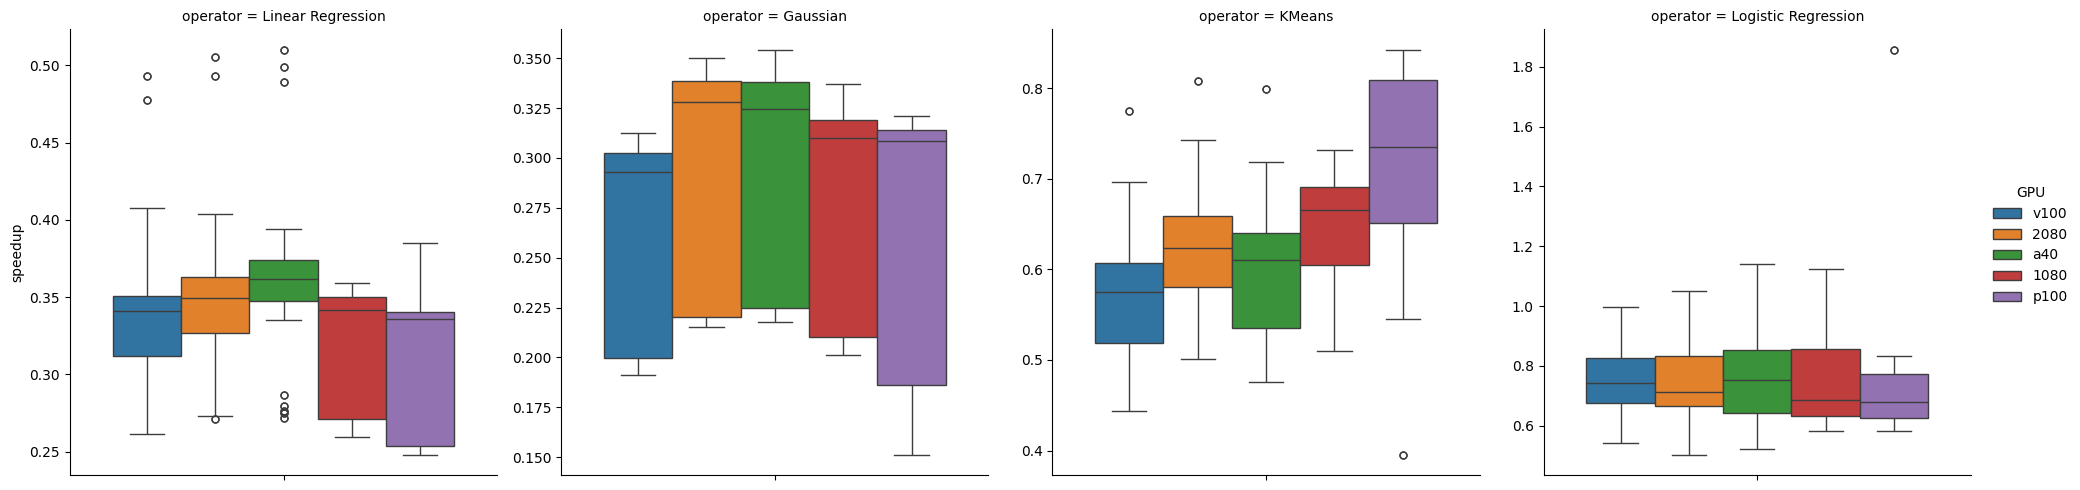

In [16]:
sns.catplot(data=tpc_df, y='speedup', hue='GPU', col='operator', kind='box', sharey=False)

<Axes: xlabel='complexity_ratio', ylabel='speedup'>

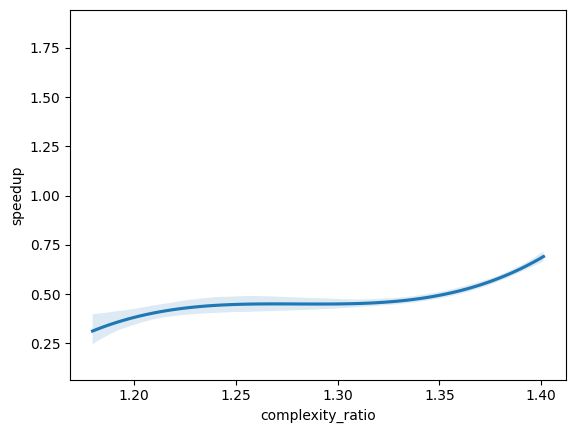

In [39]:
sns.regplot(data=tpc_df, x='complexity_ratio', y='speedup', order=3, scatter_kws={'s':0})
